# **Assignment 5 - Autoencoders**

**_Unsupervised Machine Learning_**

Group 8
 
**Part 1** - Harjinder Singh Dhesi

**Part 2** - Qichun Yu

### **Part 1** - The MNIST Neural Network

### 1. Import pickle, numpy, matplotlib, and the Sequential and Dense classes from Keras.

In [1]:
# importing necessary libraries

import pickle
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

Using TensorFlow backend.
C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\tenso

### 2. Load the mnist.pkl file, which contains the first 10,000 images and the corresponding labels from the MNIST dataset that are available in the accompanying source code. The MNIST dataset is a series of 28 x 28 grayscale images of handwritten digits, 0 through 9. You can find the mnist.pkl file in the dropbox for this assignment.

In [2]:
# loading the mnist.pkl file

with open('mnist.pkl', 'rb') as mnist:
    data = pickle.load(mnist)

# checking the keys or attributes in the data

data.keys()

dict_keys(['images', 'labels'])

In [3]:
# getting images out of the file

images = data['images']
print("shape of images data", images.shape)

# getting labels correcponding to the above images

labels = data['labels']
print("Shape of labels data", labels.shape)

shape of images data (10000, 28, 28)
Shape of labels data (10000,)


### 3. Plot the first 10 samples along with the corresponding labels. Describe what you see.

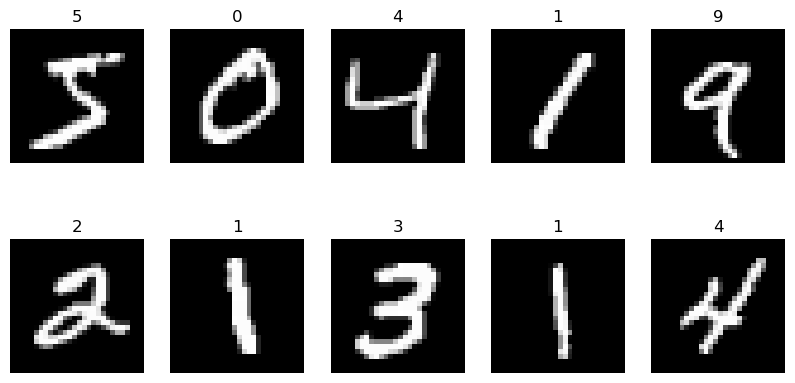

In [4]:
# plotting the first 10 sample images with their corresponding labels

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)            # 2rows 5 columns
    plt.imshow(images[i], cmap = 'gray')
    plt.title(labels[i])
    plt.axis('off')
    
plt.show()

**Observation -**

The first 10 samples are handwritten digits **5, 0, 4, 1, 9, 2, 1, 3, 1, 4**.

We can see **handwritten digits coloured in white with a black background**. 

**The image digits appear to be labelled with correct labels**. For example, digit 5 is labeled with number 5.

### 4. Encode the labels using one-hot encoding.

In [5]:
# doing one-hot-encoding of the labels

one_hot_labels = np.zeros((images.shape[0], 10))   # (10000, 10)
for index, label in enumerate(labels):
    one_hot_labels[index, label] = 1

In [6]:
one_hot_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

### 5. Prepare the images for input into a neural network. Describe what is done in the two separate steps in this process.

In [7]:
# step 1 - reshaping the images

images = images.reshape((-1, 28 ** 2)) #28**2=784

# step 2 - scaling the image pixels

images = images / 255.

**Step 1 - To Reshape the images**. We need the images to be in the shape 10,000 x 784. As each input image is 28 x 28 pixels in size, the input vector will comprise 28 * 28 = 784 values. 

**Step 2 - Normalizing the image pixels**. The next step is to scale the image pixels to be between 0 and 1, as required for all inputs in a neural network. In this way, the numbers will be small and the computation becomes easier and faster. 
Because the maximum pixel value of an image is 255, to scale it down to be between 0 and 1, we simply divide the values by 255. 

### 6. Define the three types of layers in a neural network: 'input', 'hidden' and 'output'.

##### **Three Different Types of Layers in a Neural Network**
_______________
**input** - The first layer of the neural network.
_______________
_It takes raw data as imput and pass it to the rest of the neural network. The input layer will have neurons equal to the input data. At the encoding stage, it takes the input information and compresses it through a subsequent layer that has fewer units than the size of the input data_.


________________
**hidden** - The intermediate layer between the input layer and the output layer.
_______________
_There could be one or more hidden layers. They are the key component that allows a neural network to learn complex tasks. Each input neuron will have a connection to all the neurons of the hidden layer. The last hidden layer will be connected to the output layer_.

_______________
**output** - The layer that produces the result for given inputs.
_______________
_The output layer takes as input the processed data and produces the final results.
 At the decoding stage, it expands the compressed form of the image and aims to return the compressed image to its original form._

### 7. Construct a neural network model in Keras that accepts the prepared images and has a hidden layer of 600 units with a ReLU activation function and an output of the same number of units as classes. Note that the output layer uses a softmax activation function.

In [8]:
# creating a neural network model architecture as required

model = Sequential([Dense(600, input_shape = (784,), activation = 'relu'), Dense(10, activation = 'softmax')])

### 8. Define the following terms: activation function; multiclass cross-entropy; stochastic gradient descent.




##### **Required Definitions -**
___________________
**a) activation function -**
___________________
_The activation function is used to get the output of the node or a neuron given the input. It is a function that is used to compute the weighted sum of inputs and biases, which helps decide whether a neuron should be activated or not for making the predication. Some options for the activation functions are ReLU, sigmoid, and tanh_.

___________________
**b) multiclass cross-entropy -**
___________________
_Cross-entropy is a commonly used loss function for classification problems. Cross-entropy calculates a score that summarizes the average differrence between the actual and predicted probability distributions for all classes and then using that, it measures how well the machine learning model performs_.

___________________
**c) stochastic gradient descent -**
___________________
_Stochastic gradient descent is an optimizer to minimize the loss._
_It helps to find the model parameters that correspond to the best fit between predicted and actual outputs. Stochastic gradient descent randomly selected the batch and then take a step to adjust the weights and biases to reduce the loss and improve the predictions_.

### 9. Compile the model using multiclass cross-entropy, stochastic gradient descent, and an accuracy performance metric.

In [9]:
# compiling the mnodel

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

### 10. Train the model. How many epochs are required to achieve at least 95% classification accuracy on the training data?

In [10]:
# training the model with the images data

model.fit(images, one_hot_labels, epochs = 30)

Epoch 1/30
10000/10000 [==============================] - 1s 88us/step - loss: 1.2770 - acc: 0.7144
Epoch 2/30
10000/10000 [==============================] - 1s 89us/step - loss: 0.6103 - acc: 0.8626
Epoch 3/30
10000/10000 [==============================] - 1s 85us/step - loss: 0.4696 - acc: 0.8858
Epoch 4/30
10000/10000 [==============================] - 1s 86us/step - loss: 0.4066 - acc: 0.8958
Epoch 5/30
10000/10000 [==============================] - 1s 80us/step - loss: 0.3693 - acc: 0.9028
Epoch 6/30
10000/10000 [==============================] - 1s 77us/step - loss: 0.3426 - acc: 0.9098
Epoch 7/30
10000/10000 [==============================] - 1s 81us/step - loss: 0.3224 - acc: 0.9159
Epoch 8/30
10000/10000 [==============================] - 1s 78us/step - loss: 0.3066 - acc: 0.9195
Epoch 9/30
10000/10000 [==============================] - 1s 79us/step - loss: 0.2931 - acc: 0.9211
Epoch 10/30
10000/10000 [==============================] - 1s 81us/step - loss: 0.2817 - acc: 0.9232

It can be seen above that in order **to get atleast 95% accuracy, 25 epochs are required**.

### **Part 2 -** Simple MNIST Autoencoder

### 1. Import pickle, numpy, and matplotlib, as well as the Model, Input, and Dense classes, from Keras.

In [11]:
# importing necessary libraries

from keras.models import Model
from keras.layers import Input

### 2. Load the images from the supplied sample of the MNIST dataset.

In [12]:
# loading the images 

with open('mnist.pkl', 'rb') as mnist:
    images = pickle.load(mnist)['images']

### 3. Prepare the images for input into a neural network, the same way you did in part 1.

In [13]:
# reshaping the images

images = images.reshape((-1, 28 ** 2))  # 28**2=784

# scaling the image pixels

images = images / 255.

### 4. Define what is meant by the input layer, encoding stage, and decoding stage of an autoencoder.

| Terms | Definition |
| :-: | :- |
| __input layer__ | The first layer of the autoencoder. It takes as input the raw data and pass it to the rest of the neural network. The input layer will have neurons equal to the input data. |
| __encoding stage__ | The first stage of autoencoder that takes the input information and compresses it through a subsequent layer that has fewer units than the size of the input data. |
| __decoding stage__ | The latter stage of autoencoder that expands the compressed form of the image and aims to return the compressed image to its original form.|

### 5. Construct a simple autoencoder network that reduces the image size to 10 x 10 after the encoding stage.

In [14]:
# defining the autoencoder model with an input layer of 784 units

input_layer = Input(shape = (784,))

In [15]:
# defining a subsequent encoder layer with 100 units (10X10)

encoding_stage = Dense(100, activation = 'relu')(input_layer)

In [16]:
# defining a subsequent decoder layer with the same number of units as the input layer

decoding_stage = Dense(784, activation = 'sigmoid')(encoding_stage)

In [17]:
# constructing the model by passing the first and last layers to the Model Class

autoencoder = Model(input_layer, decoding_stage)

### 6. Compile the autoencoder using a binary cross-entropy loss function and adadelta gradient descent.

In [18]:
# compiling the autoencoder model

autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adadelta')

### 7. How is adadelta gradient descent different than stochastic gradient descent?

**Stochastic gradient descent** makes adjustments by taking previous epochs and gradients into consideration, whereas, **Adadelta optimizer** makes adjustments by taking exponentially decaying weighted average of the past gradients intead of accumulating those gradients. 

### 8. Fit the encoder model.

In [19]:
# training the model on the image data

autoencoder.fit(images, images, epochs = 100)

Epoch 1/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.3222
Epoch 2/100
10000/10000 [==============================] - 1s 65us/step - loss: 0.2378
Epoch 3/100
10000/10000 [==============================] - 1s 68us/step - loss: 0.2081
Epoch 4/100
10000/10000 [==============================] - 1s 79us/step - loss: 0.1897
Epoch 5/100
10000/10000 [==============================] - 1s 71us/step - loss: 0.1773
Epoch 6/100
10000/10000 [==============================] - 1s 67us/step - loss: 0.1675
Epoch 7/100
10000/10000 [==============================] - 1s 74us/step - loss: 0.1594
Epoch 8/100
10000/10000 [==============================] - 1s 68us/step - loss: 0.1524
Epoch 9/100
10000/10000 [==============================] - 1s 70us/step - loss: 0.1464
Epoch 10/100
10000/10000 [==============================] - 1s 80us/step - loss: 0.1410
Epoch 11/100
10000/10000 [==============================] - 1s 71us/step - loss: 0.1362
Epoch 12/100
10000/10000 [===============

10000/10000 [==============================] - 1s 60us/step - loss: 0.0760
Epoch 95/100
10000/10000 [==============================] - 1s 59us/step - loss: 0.0759
Epoch 96/100
10000/10000 [==============================] - 1s 61us/step - loss: 0.0759
Epoch 97/100
10000/10000 [==============================] - 1s 60us/step - loss: 0.0758
Epoch 98/100
10000/10000 [==============================] - 1s 64us/step - loss: 0.0757
Epoch 99/100
10000/10000 [==============================] - 1s 64us/step - loss: 0.0756
Epoch 100/100
10000/10000 [==============================] - 1s 59us/step - loss: 0.0755


### 9. Calculate and store the output of the encoding stage for the first five samples.

In [20]:
# getting the output of the encoding stage for firt five samples

encoder_output = Model(input_layer, encoding_stage).predict(images[:5])

### 10. Reshape the encoder output to 10 x 10 (10 x 10 = 100) pixels and multiply by 255.

In [21]:
# reshaping the output from the encoding layer as required

encoder_output = encoder_output.reshape((-1, 10, 10)) * 255

### 11. Calculate and store the output of the decoding stage for the first five samples.

In [22]:
# getting the output of the decoding layer for first five samples

decoder_output = autoencoder.predict(images[:5])

### 12. Reshape the output of the decoder to 28 x 28 and multiply by 255.

In [23]:
# reshaping the output from the decoding layer as required

decoder_output = decoder_output.reshape((-1, 28, 28)) * 255

### 13. Plot the original image, the encoder output, and the decoder. Describe what is seen in each set of images.

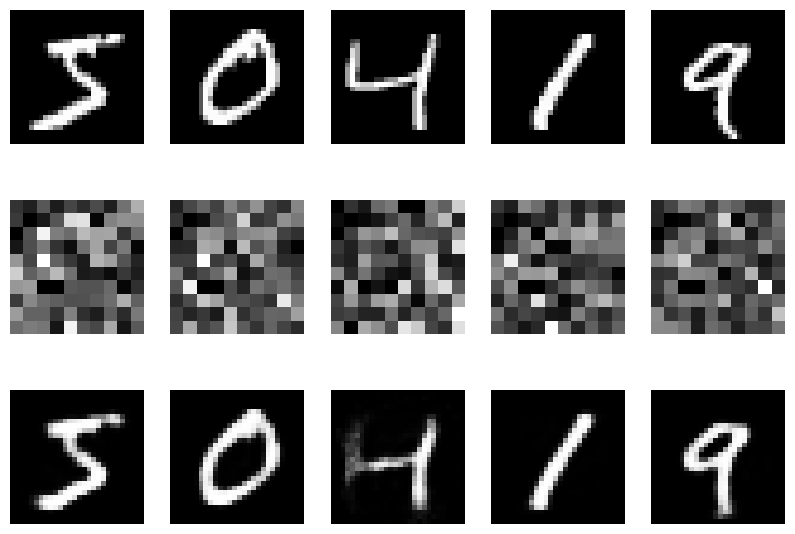

In [24]:
images = images.reshape((-1, 28, 28))

# plotting the original image and the output of encoder and decoder layers

plt.figure(figsize=(10, 7))

for i in range(5):

    # plotting the original images

    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')

    # plotting the encoder output

    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap = 'gray')
    plt.axis('off')

    # plotting the decoder output

    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap = 'gray')
    plt.axis('off')

plt.show()

We can see three rows of images. 

The **first row** contains the original images, which are the handwritten digits '5', '0', '4', '1', and '9'. 

The **second row** is the corresponding autoencoder output for the original images. It is hard to see the shape of the image because they are encoded (compressed after reducing the input information). 

The **third row** of images is the reconstruction of the original image from the encoded input. We can see that all have the basic shape of the handwritten digit '5', '0', '4', '1', and '9'.

The left-hand side of the number '4' is a little bit fuzzy compared with others but it is recognizable from human eyes. Overall, the model is performing well. If we want better performance with clear images, adding additional layers could be a good option. 